<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220512_ml_11_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 19.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=06c32801062c0db4654a19015314c9187e180be21335465d09dcf23142265bef
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [82]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 선형회귀 (Linear Regression)

회귀 모델이란? -> 선

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)


- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - \\( (wx + e = y) \\)  =  \\((ax + b =y)\\)
 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)
 

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



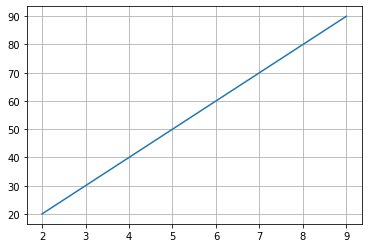

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

plt.plot(x,y)
plt.grid()
plt.show()

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>



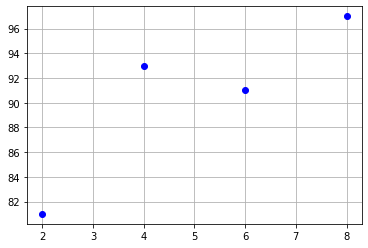

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

plt.plot(x, y, 'bo')
plt.grid()
plt.show()

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [6]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

In [16]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    # 분자부분
    dc = 0
    for i in range(len(x)) :
        dc = (x[i] - mean_x) * (y[i] - mean_y)

    # 분모부분
    divisor = 0
    for i in range(len(x)) :
        divisor += (x[i] - mean_x)**2

    a = dc / divisor
    return a

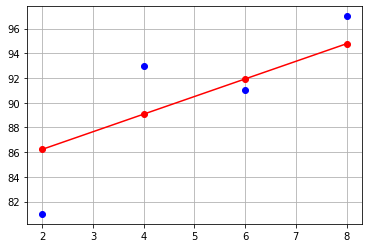

In [17]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

mx = np.mean(x)
my = np.mean(y)
a = compute_a(x, y, mx, my) # 기울기
b = my - (mx * a)           # 절편

y_pred = [a * x1 + b for x1 in x]

plt.plot(x, y, 'bo')
plt.plot(x, y_pred, 'r-o')
plt.grid()
plt.show()

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  \\( y=Wx+b \\)  
  - (W : 가중치, b : 편향(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

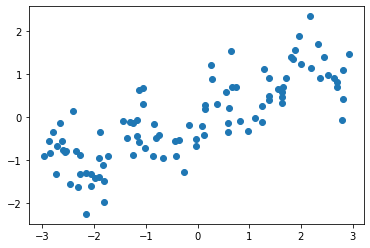

In [20]:
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(100) # 100개짜리 데이터 만들기!
plt.scatter(X, y)
plt.show()

w[0]: 0.393906  b: -0.031804


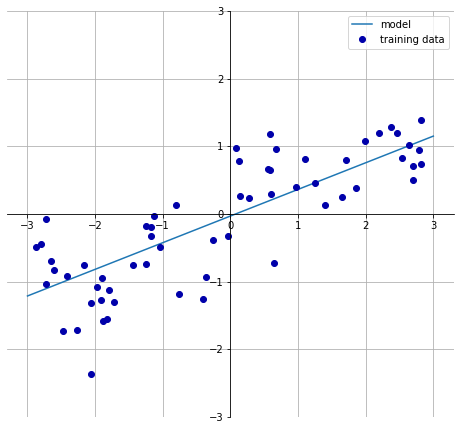

In [21]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이 -> 오차 계산 하는 것임
  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

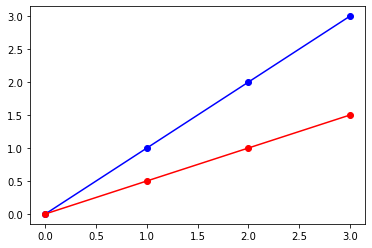

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred1 = w* x + b
plt.plot(x, y_pred1, 'b-o')

w = 0.5
b = 0
y_pred2 = w* x + b
plt.plot(x, y_pred2, 'r-o')

plt.show()

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [27]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y): # 오차값 구하기!
  cost = np.sum( (y_pred - y )**2 / len(y) )
  return cost

MSE(y_pred1, y), MSE(y_pred2, y)

(0.0, 0.875)

#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

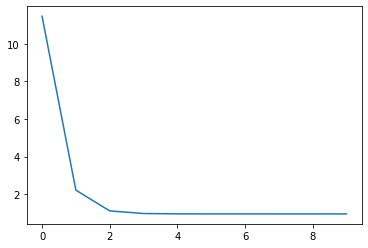

(2.058814906714706, 3.944341041467314)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []

n_samples = 200
x = np.random.randn(n_samples)
y = 2 * x + 4 + np.random.randn(n_samples)

n_epoch = 10 # 반복횟수
lr = 0.7     # 학습속도

w = np.random.uniform()
b = np.random.uniform()

for epoch in range( n_epoch ) : 
    y_pred = w * x + b
    cost = MSE(y_pred, y)
    w_diff = ((y_pred - y) * x).mean() # 기울기 차이
    b_diff = (y_pred - y).mean()       # 절편 차이

    w = w - ( lr * w_diff )
    b = b - ( lr * b_diff )

    w_val.append(w)
    cost_val.append(cost)


# plt.plot(x, y, 'o')
plt.plot(range(n_epoch), cost_val)
plt.show()
w, b

#### LinearRegression 실습 01

배달시간 예측
- 설정 거리의 장소에 배달하려면 얼마나 걸리는지 예측

In [38]:
import numpy as np 
from matplotlib import pyplot as plt 

In [40]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

x = data[:, 0] # 배달거리
y = data[:, 1] # 배달시간

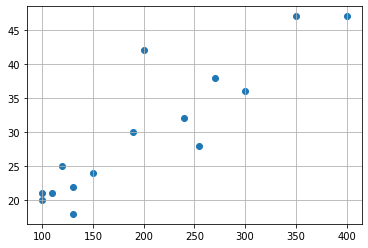

In [41]:
plt.scatter(x, y)
plt.grid()

In [42]:
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    xa = np.array(x)
    ya = np.array(y)
    dc = np.sum( (x - mean_x) * (y - mean_y) ) # 분자 부분
    divisor = np.sum( (x-mean_x)**2 )          # 분모 부분 
    return dc / divisor 

a = compute_a( x, y, mx, my ) # 기울기
b = my - ( mx *a )# 절편
a, b

(-0.23380065564623004, 91.66900327823114)

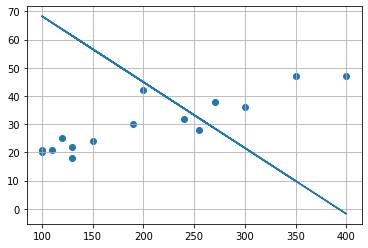

In [43]:
y_pred = a * x + b
plt.plot(x, y_pred)
plt.scatter(x, y)
plt.grid()

- 예측하기 (거리가 350인경우 배달시간)

In [44]:
y_pred = a * 350 + b
y_pred

9.838773802050625

#### 일반 선형회귀

예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

단순 선형회귀 (Simple Linear Regression)
> \\( H({ x })={ W }{ x }+b \\)

다변수 선형회귀 (Multi-variable Linear Regreesion)
> 변수가 3개 일때의 H(x) <br>
> \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+b \\)

> 변수가 n개 일때의 H(x) <br>
>  \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 },\dots ,{ x }_{ n })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+\dots +{ W }_{ n }{ x }_{ n }+b \\)

다항 회귀 (Polynomial Regreesion)
> 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것 <br>
> 차수가 높아질수록 과적합의 문제가 발생


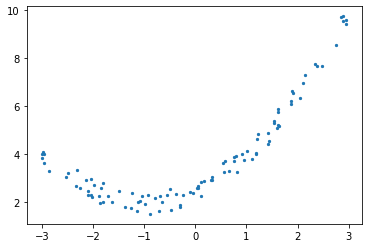

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
X = 6 * np.random.rand(n, 1) -3
y = 0.5 * X**2 + 1 * X + 2 +  np.random.rand(n, 1)

plt.scatter(X, y, s = 5)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly  = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X.shape, X_poly.shape

((100, 1), (100, 2))

In [57]:
X[0], X_poly[0]

(array([-2.94830703]), array([-2.94830703,  8.69251437]))

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)
model.coef_, model.intercept_

(array([[1.00117842, 0.49059215]]), array([2.52424807]))

#### LinearRegression 실습 02

wave 데이터셋에 선형회귀 적용

LinearRegression()
```
LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
```
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- n_jobs : 계산에 사용할 작업 수

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
X, y = mglearn.datasets.make_wave(60)
# plt.scatter(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_


(array([0.39390555]), -0.031804343026759746)

In [61]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6700890315075756, 0.65933685968637)

#### LinearRegression 실습 03 - 1
변수가 1개인 경우

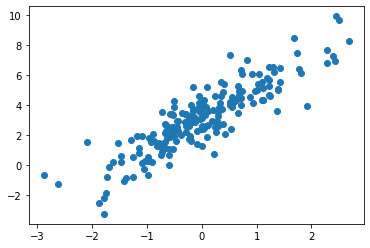

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 200
x = np.random.randn(n_samples)
# 계수 및 절편
w = 2
b = 3
# 노이즈
y = w * x + b + np.random.randn(n_samples)

plt.scatter(x, y)

In [63]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
model.coef_, model.intercept_

(array([1.98451752]), 3.146283666271329)

#### LinearRegression 실습 03 - 2
변수가 2개인 경우

다변수 선형 회귀 (Multi-variable Linear Regreesion)



In [64]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

X = pd.DataFrame({'x1' : x1, 'x2' : x2})
model = LinearRegression().fit(X, y)
model.coef_, model.intercept_

(array([1.98175195, 3.01380775]), 4.084899861419425)

#### LinearRegression 실습 04

보스턴 집값 데이터셋 구성
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
```
0 CRIM : 인구 1인당 범죄 발생 수
1 ZN : 25,000평방 피트 이상의 주거 구역 비중
2 INDUS : 소매업 외 상업이 차지하는 면적 비율
3 CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
4 NOX : 일산화질소 농도
5 RM : 집의 평균 방 수
6 AGE : 1940년 이전 지어진 비율
7 DIS : 5가지 보스턴 시 고용 시설까지의 거리
8 RAD : 순환고속도로의 접근 용이성
9 TAX : $10,000당 부동산 세율 총계
10 PTRATIO : 지역별 학생과 교사 비율
11 B : 지역별 흑인 비율
12 LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
13 MEDV : 가격 (단위 : $1,000)
```

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()
boston.data.shape

In [ ]:
# 데이터 세트 DataFrame 변환
X , y = load_boston(return_X_y = True)

In [71]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7697699488741149, 0.635463843320211)

In [76]:
# 예측/평가
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
print(f'MSE = {mse : .3f}, RMSE = {rmse : .3f}, R2 = {r2score : .3f}')

MSE =  29.782, RMSE =  5.457, R2 =  0.635


In [77]:
model.coef_

array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

# 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가, bias는 감소 -> Overfitting 발생

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" alt="편향과 분산" width="40%" />

 Bias(편향) 오차와 Variance(분산) 오차를 표현

</center>

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함
- Overfitting 문제 해결 : 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD" alt="모델 복잡도" width="40%" />

 모델 복잡도

</center>




정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=yellow>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=yellow>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font>


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 – 가중치에 대한 제곱의 합을 사용
- <font  color=yellow>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=yellow> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=yellow>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

> \\( cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) \\)

> MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 bias는 증가하고 variance는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=yellow>bias을 약간 손해보면서 variance를 크게 줄여</font> 성능의 향상

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [97]:
import re
# 확장 보스턴 집값
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [98]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9520519609032727, 0.6074721959665571)

확장 보스턴 집값 셋에 릿지회귀 적용

In [106]:
# model_ridge
model_ridge = Ridge(alpha=1).fit(X_train, y_train)
model_ridge.score(X_train, y_train), model_ridge.score(X_test, y_test), np.round(model_ridge.coef_[0],3)

(0.8857966585170941, 0.7527683481744751, -1.414)

In [107]:
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
model_ridge.score(X_train, y_train), model_ridge.score(X_test, y_test), np.round(model_ridge.coef_[0],3)

(0.7882787115369614, 0.6359411489177309, -0.812)

In [108]:
model_ridge = Ridge(alpha = 0.1).fit(X_train, y_train)
model_ridge.score(X_train, y_train), model_ridge.score(X_test, y_test), np.round(model_ridge.coef_[0],3)

(0.928227368500199, 0.7722067936479818, -2.333)

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용

>$$  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum\limits_{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits_{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} $$


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [116]:
from sklearn.linear_model import Lasso

# lasso -> alpha는 내려야 함, 내릴수록 사용하는 특성이 많아짐
model_lasso = Lasso(alpha =1).fit(X_train, y_train)
model_lasso.score(X_train, y_train), model_lasso.score(X_test, y_test), np.sum(model_lasso.coef_ != 0)

(0.29323768991114607, 0.20937503255272294, 4)

In [119]:
model_lasso = Lasso(alpha =0.1).fit(X_train, y_train)
model_lasso.score(X_train, y_train), model_lasso.score(X_test, y_test), np.sum(model_lasso.coef_ != 0)

(0.7709955157630054, 0.6302009976110041, 8)

In [121]:
model_lasso = Lasso(alpha =0.01).fit(X_train, y_train)
model_lasso.score(X_train, y_train), model_lasso.score(X_test, y_test), np.sum(model_lasso.coef_ != 0)

(0.8961122320864716, 0.7677995670886713, 32)

## ElasticNet Regression

- 선형 회귀에 2가지 규제항 (L1 규제항, L2 규제항)을 추가한 것

> \begin{align}
cost(W,b)\\ 
& =MSE+규제항\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum\limits _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum\limits_{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:가중치의개수,α:규제의정도) \end{align}

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- l1_ratio : L1 규제의 비율 (혼합비율?)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

## Linear / Ridge / Lasso / ElasticNet Regression의 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

## 다항회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  



In [ ]:
# 다항회귀 그래프


#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 ] \\)  <br>

> 예) <br>
> \\( [x_1=0, x_2=1]  \;\; \rightarrow \;\; [1, 0, 1, 0, 0, 1] \\) <br>

> \\( [x_1=2, x_2=3]  \;\; \rightarrow \;\; [1,2,3,4,6,9] \\)
 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# 다항차수는 적용하지 않고, 오직 상호작용(교호작용) 효과만을 분석하려면 
# interaction_only=True 옵션을 설정해주면 됩니다. 
# degree를 가지고 교호작용을 몇 개 수준까지 볼지 설정해줄 수 있습니다.



# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

#### 4개 속성 모두 이용

세가지 꽃 구분

In [123]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [124]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=0).fit(X_train, y_train)
model.coef_, model.intercept_

(array([[  14.02131239,   26.9209198 ,  -49.35501963,  -24.11665732],
        [  35.52447552, -130.34965035,   32.44755245,  -99.58041958],
        [-105.85225456,  -87.30412536,  165.65398145,  141.66933163]]),
 array([   9.89148655,  113.50628185, -116.53396012]))

In [125]:
model.score(X_train, y_train),  model.score(X_test, y_test)

(0.9196428571428571, 0.8421052631578947)

# Logistic Regression


선형 회귀로 풀리지 않는 문제 -> 독립변수와 종속변수가 비선형 관계인 경우

 <img src="https://www.geogebra.org/resource/SYzqYk7Y/xIOqFXlBGbAVa8OG/material-SYzqYk7Y.png" alt="비선형1" width="40%" />

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Polynomialdeg5.svg/1200px-Polynomialdeg5.svg.png" alt="비선형2" width="40%" />




공부시간과 합격률의 관계 -> 연속적으로 변하는 공부시간의 결과에 대해 “합격했다” 또는
“합격하지 않았다?”의 결과만 필요

분류방법 1 -> 선형분류

더 나은 분류 방법은?

- 1958년 D.R.Cox가 제안한 확률 모델로 <font  color=yellow>독립변수의 선형 결합을 이용하여 종속변수 (사건의 발생 가능성)을 예측</font>하는데 사용되는 통계 기법 
 - 종속 변수가 <font  color=yellow>범주형 데이터를 대상</font> -> 분류

- 선형 회귀는 독립변수 x가 변화할 때 종속변수 y가 어떻게 변하는 지 예측하는 것
- 선형 회귀에서 x와 y의 범위 : [-∞, ∞]

- 연속적으로 변하는 2개의 결과만을 확인하는 경우
 - 조사회수가 많아지면 종속 변수 y는 확률로 표현됨
 - 독립변수의 범위는 [-∞, ∞], 종속변수의 범위는 [0, 1]
 - 선형회귀를 적용하면 종속변수의 값 범위를 넘어가는 문제가 발생 
 - 예측정확도 하락 
 - <font  color=yellow>로지스틱 모형</font> 적용

로지스틱 회귀는 선형 회귀 분석과 유사하지만 종속 변수(y)가 범주형 데이터를 대상으로 하며, 입력 데이터(x)가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류모델 기법으로 사용

합격을 1, 불합격을 0으로 하는 1과 0사이의 직선은 그리기 어렵움
 - 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 곡선이면 편리

로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정

시그모이드 함수 e(자연상수)는 무리수 값 2.71828...
 - 파이처럼 상수로 고정된 값

#### 로지스틱 함수 (sigmoid 함수)

오즈 (odds) : 성공확률이 실패확률에 비해 몇 배 높은가를 나타냄, 범위 [0, 1]

> \\( odds=\frac { p(y) }{ 1-p(y) }  \\)

로짓 변환 : 오즈에 자연로그를 취한 것으로 입력 값의 범위가 [0, 1] 일 때 출력 값의 범위를 [-∞, ∞]
로 조정

> \\( \log _{ e } {\frac { p(y) }{ 1-p(y) }} =\ln { \frac { p(y) }{ 1-p(y) }  }  \\)

로지스틱 함수 (sigmoid 함수) : 독립변수 x가 어느 숫자이든 상관없이 종속 변수의 값의 범위가 항
상 [0, 1] 범위에 있도록 함

> \\( \ln { \frac { p(y) }{ 1-p(y) }  }  = z  \\) <br>

> -> \\(  \frac { p(y) }{ 1-p(y) }   = { e }^{ z  }  \\) <br>

> -> $ \\ \begin{align}
p & = \frac {  { e }^{ z  }  }{ 1 +  { e }^{ z  }  } \\
& = \frac {  1  }{ 1 +  { e }^{(- z)  }  } 
\end{align} \\ $

#### 로지스틱 회귀 (Logistic Regression)

- 간단하면서도 파라미터의 수가 적어서 빠르게 예측
 - 다른 알고리즘과의 비교 기준점으로 사용
- 로지스틱 함수를 사용하여 확률을 추정하며 2 클래스 및 다중 클래스 분류를 위한 강력한 통계 방법으로 빠르고 단순
- 직선 대신 S 모양 곡선을 사용한다는 사실 때문에 데이터를 그룹으로 나누는 데 적합
- 용도 : 신용 점수, 마케팅 캠페인의 성공률 측정, 특정 제품의 매출 예측률, 특정 날에 지진이 발생할 확률 등



- 선형 회귀 방식을 분류에 적용한 알고리즘 (선형 회귀 계열)

- Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교
- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)

- 이 규칙은 Classifier에 쓰이는 모든 Linear model에서 동일
- 가장 널리 알려진 두 개의 linear classifier algorithm
  1. Logistic Regression
  1. Support Vector Classifier의 Linear SVC

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
```
LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
```
- <font  color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2 </font>
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font  color=yellow> C : 규제 강도 </font>
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- <font  color=yellow> l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) </font>

#### LogisticRegression 실습 01

학습시간 대비 합격분류 적용


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [130]:
# 학습시간 대비 합격 데이터
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [133]:
# X
X = np.hstack( (pass_time, fail_time) )
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [135]:
# y
y1 = [1] * len(pass_time) # 합격 1
y0 = [0] * len(fail_time) # 불합격 0

y = np.hstack( (y1, y0) )
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

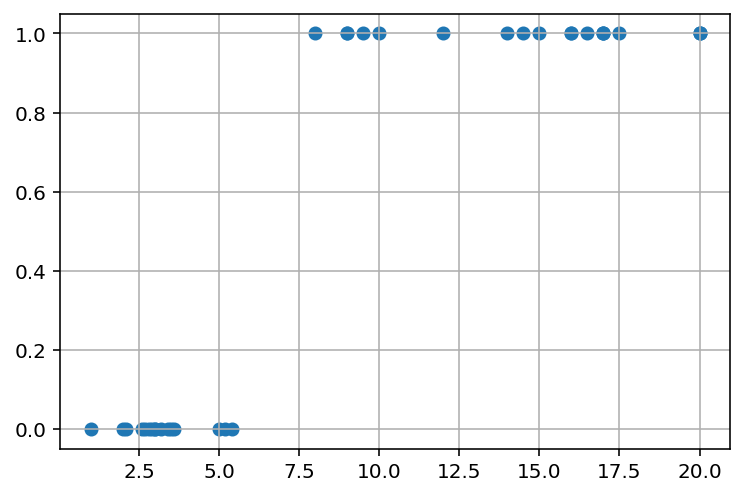

In [137]:
# 시각화
plt.scatter(X, y)
plt.grid()
plt.show()

In [138]:
# 모델학습
model = LogisticRegression().fit(X.reshape(-1, 1), y)
model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [139]:
# 예측 분류
model.predict( [[7.0], [6.9]] )

array([1, 0])

In [140]:
model.predict_proba([[7.0], [6.9]]  )

array([[0.46974336, 0.53025664],
       [0.50294437, 0.49705563]])

In [ ]:
# 모델시각화

* 로지스틱회귀를 퍼셉트론 방식으로 표현

<center>
 <img src="https://thebook.io/img/080228/100.jpg" alt="퍼셉트론" width="40%" />

</center>


#### Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)
- 학습속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

#### 소프트맥스

- 세 개 이상 입력 값을 다루기 위함(다중분류)
- 다항 로지스틱스

> \\( { y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }  \\)